In [1]:
#随机梯度上升测试
def Gradient_Ascent_test(x_old):
    def f_prime(x_old):
        return -2 * x_old + 4
    x_new = 0
    alpha = 0.1
    precision = 0.00000001
    while abs(x_new - x_old) > precision:
        x_old = x_new
        x_new = x_old + alpha * f_prime(x_old)
    print(x_new)
    
Gradient_Ascent_test(1)
Gradient_Ascent_test(2)
Gradient_Ascent_test(3)
Gradient_Ascent_test(0.0001)

1.9999999646630588
1.9999999646630588
1.9999999646630588
1.9999999646630588


In [134]:
import matplotlib.pyplot as plt
from numpy import *

def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

def sigmoid(inX):
    return 1.0/(1 + exp(-inX))

#梯度上升算法
def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)
    labelMat = mat(classLabels).transpose()
    m, n = shape(dataMatrix)
    alpha = 0.01
    maxCycles = 500
    weights = ones((n, 1))
    for i in list(range(maxCycles)):
        h = sigmoid(dataMatrix * weights)
        error = labelMat - h
        weights = weights + alpha*dataMatrix.transpose()*error
    return weights.getA()

dataMat, labelMat = loadDataSet()      
gradAscent(dataMat, labelMat)

array([[12.78439352],
       [ 1.11820764],
       [-1.74082686]])

In [45]:
def plotDataSet(weights):
    dataMat, labelMat = loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataMat)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if labelMat[i] == 1:
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=20, c='red', marker='s', alpha=0.5)
    ax.scatter(xcord2, ycord2, s=20, c='green', alpha=0.5)
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.title('DataSet')
    plt.xlabel('x'); plt.ylabel('y')
    plt.show()

#随机梯度上升
def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i] * weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

#改进的随机梯度上升
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = shape(dataMatrix)
    weights = ones(n)
    for j in list(range(numIter)):
        dataIndex = list(range(m))
        for i in list(range(m)):
            alpha = 4/(1.0 + j + i)+0.01
            randIndex = int(random.uniform(0, len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex] * weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

stocGradAscent1(array(dataMat), labelMat)
# weights = gradAscent(dataMat, labelMat)
#plotDataSet(weights)

array([14.25350394,  0.79210454, -1.83406822])

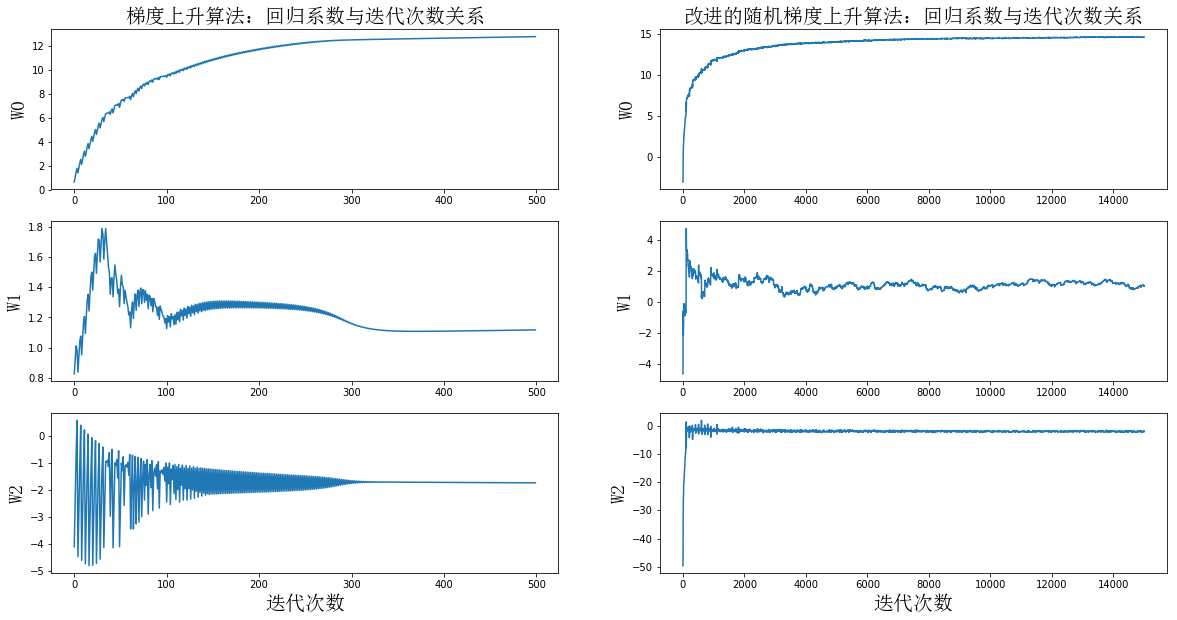

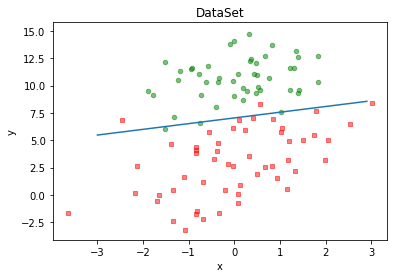

In [123]:
def gradAscentPlot(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)
    labelMat = mat(classLabels).transpose()
    m, n = shape(dataMatrix)
    alpha = 0.01
    maxCycles = 500
    weights = ones((n, 1))
    weights_array = array([])
    for i in range(maxCycles):
        h = sigmoid(dataMatrix * weights)
        error = labelMat - h
        weights = weights + alpha*dataMatrix.transpose()*error
        weights_array = append(weights_array,weights)
    weights_array = weights_array.reshape(maxCycles,n)
    return weights.getA(),weights_array

#画迭代次数的图用的，因为需要获得每次迭代的权重，所以不能用于实际分类，不然weight_array计算量太大
def stocGradAscent1Plot(dataMatrix, classLabels, numIter=150):
    m,n = shape(dataMatrix)
    weights = ones(n)
    weights_array = array([])
    for j in list(range(numIter)):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4/(1.0 + j + i)+0.01
            randIndex = int(random.uniform(0, len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex] * weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            weights_array = append(weights_array,weights,axis=0)
            del(dataIndex[randIndex])
    weights_array = weights_array.reshape(numIter*m,n)
    return weights,weights_array

def plotWeights(weights_array1,weights_array2):
    from matplotlib.font_manager import FontProperties
    #设置汉字格式
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
    #将fig画布分隔成1行1列,不共享x轴和y轴,fig画布的大小为(13,8)
    #当nrow=3,nclos=2时,代表fig画布被分为六个区域,axs[0][0]表示第一行第一列
    fig, axs = plt.subplots(nrows=3, ncols=2,sharex=False, sharey=False, figsize=(20,10))
    x1 = arange(0, len(weights_array1), 1)
    #绘制w0与迭代次数的关系
    axs[0][0].plot(x1,weights_array1[:,0])
    axs0_title_text = axs[0][0].set_title(u'梯度上升算法：回归系数与迭代次数关系',FontProperties=font)
    axs0_ylabel_text = axs[0][0].set_ylabel(u'W0',FontProperties=font)
    plt.setp(axs0_title_text, size=20, weight='bold', color='black') 
    plt.setp(axs0_ylabel_text, size=20, weight='bold', color='black')
    #绘制w1与迭代次数的关系
    axs[1][0].plot(x1,weights_array1[:,1])
    axs1_ylabel_text = axs[1][0].set_ylabel(u'W1',FontProperties=font)
    plt.setp(axs1_ylabel_text, size=20, weight='bold', color='black')
    #绘制w2与迭代次数的关系
    axs[2][0].plot(x1,weights_array1[:,2])
    axs2_xlabel_text = axs[2][0].set_xlabel(u'迭代次数',FontProperties=font)
    axs2_ylabel_text = axs[2][0].set_ylabel(u'W2',FontProperties=font)
    plt.setp(axs2_xlabel_text, size=20, weight='bold', color='black') 
    plt.setp(axs2_ylabel_text, size=20, weight='bold', color='black')
 
 
    x2 = arange(0, len(weights_array2), 1)
    #绘制w0与迭代次数的关系
    axs[0][1].plot(x2,weights_array2[:,0])
    axs0_title_text = axs[0][1].set_title(u'改进的随机梯度上升算法：回归系数与迭代次数关系',FontProperties=font)
    axs0_ylabel_text = axs[0][1].set_ylabel(u'W0',FontProperties=font)
    plt.setp(axs0_title_text, size=20, weight='bold', color='black') 
    plt.setp(axs0_ylabel_text, size=20, weight='bold', color='black')
    #绘制w1与迭代次数的关系
    axs[1][1].plot(x2,weights_array2[:,1])
    axs1_ylabel_text = axs[1][1].set_ylabel(u'W1',FontProperties=font)
    plt.setp(axs1_ylabel_text, size=20, weight='bold', color='black')
    #绘制w2与迭代次数的关系
    axs[2][1].plot(x2,weights_array2[:,2])
    axs2_xlabel_text = axs[2][1].set_xlabel(u'迭代次数',FontProperties=font)
    axs2_ylabel_text = axs[2][1].set_ylabel(u'W2',FontProperties=font)
    plt.setp(axs2_xlabel_text, size=20, weight='bold', color='black') 
    plt.setp(axs2_ylabel_text, size=20, weight='bold', color='black')
 
    plt.show() 
weights1,weights_array1 = stocGradAscent1Plot(array(dataMat), labelMat)
weights2,weights_array2 = gradAscentPlot(dataMat, labelMat)
plotWeights(weights_array2, weights_array1)
plotDataSet(weights1)

In [132]:
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5: return 1.0
    else: return 0.0

def colicTest():
    frTrain = open('horseColicTraining.txt')
    frTest = open('horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in list(range(21)):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[-1]))
    trainingWeights = gradAscent(array(trainingSet), trainingLabels)
    trainingWeights = trainingWeights[:,0]
    #trainingWeights = stocGradAscent1(array(trainingSet), trainingLabels, 500)
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in list(range(21)):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr), trainingWeights)) != int(currLine[-1]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print('the error rate of this test is: %f' % errorRate)
    return errorRate

In [135]:
def multiTest(numTests):
    errorSum = 0.0
    for k in list(range(numTests)):
        errorSum += colicTest()
    print('after %d iterations the average error rate is: %f' % (numTests, errorSum/float(numTests)))

multiTest(10)

the error rate of this test is: 0.283582
the error rate of this test is: 0.283582
the error rate of this test is: 0.283582
the error rate of this test is: 0.283582
the error rate of this test is: 0.283582
the error rate of this test is: 0.283582
the error rate of this test is: 0.283582
the error rate of this test is: 0.283582
the error rate of this test is: 0.283582
the error rate of this test is: 0.283582
after 10 iterations the average error rate is: 0.283582
